# Linear Regression


In section $\S 1$ we consider **simple** linear regression ("simple" means that the input variable is **one-dimensional**). We will create a custom linear regression model using batch gradient descent. 

In section $\S2$ we will use ```sklearn LinearRegression``` class. First, we will consider simple linear regression (input variable is one-dimensional), and afterwards, we will consider **multiple** linear regression (input variable is **multi-dimensional**). 

In section $\S3$ we will implement Polynomial Regression using ```sklearn```. 

---

---

## 1) Custom Simple Linear Regression Code -- Single Neuron Model with Gradient Descent

Consider dataset $D = \{ (x^{(1)}, y^{(1)}), \ldots, (x^{(n)}, y^{(n)})\}$ where $x^{(i)}, y^{(i)} \in \mathbb R$.

Simple linear regression model is given by $h(x) = wx + b$.

We want to find parameters $w$ and $b$ that minimize the mean sqaured error loss function:

$$
L(w, b; D) = \frac{1}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

where $\hat{y}^{(i)} = h(x^{(i)}) = w x^{(i)}+b$ and $D$ is the data set.  

Since $L(w, b; D)$ is a differentiable function of both $w$ and $b$, we can try to solve this minimization problem by applying the gradient descent algorithm:

$$
w_{new} = w - \alpha \frac{\partial L}{\partial w}(w, b; D)
$$

$$
b_{new} = b - \alpha \frac{\partial L}{\partial b}(w, b; D)
$$

where $\alpha$ is the learning rate hyperparameter and the derivaties are given by 

$$
\frac{\partial L}{\partial w}(w, b; D) = \frac{2}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)x^{(i)}
$$

$$
\frac{\partial L}{\partial b}(w, b; D) = \frac{2}{n}\sum_{i=1}^{n}\Big(\hat{y}^{(i)} - y^{(i)}\Big)
$$

---

---

We will consider setosa flowers in the iris data set and we'll use linear regression to predict "sepal width" as a linear function of "sepal length".

---

In [303]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("iris_dataset.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [304]:
df = df.iloc[:50][["sepal_length", "sepal_width"]]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [305]:
df.shape

(50, 2)

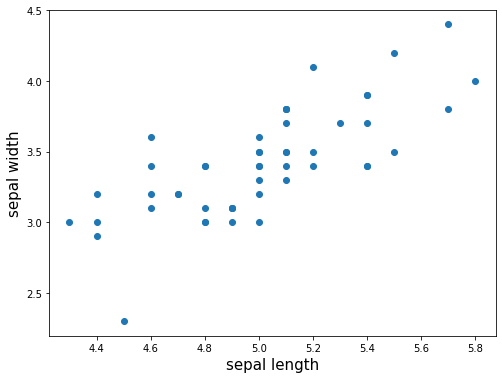

In [306]:
# We create the scatter plot

plt.figure(figsize = (8, 6))

plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15);

In [307]:
# We compute covariance between the two variables

df.cov()

,sepal_length,sepal_width
sepal_length,0.124249,0.100298
sepal_width,0.100298,0.145180


In [308]:
# We cpompute the correlation between the two variables

df.corr()

,sepal_length,sepal_width
sepal_length,1.00000,0.74678
sepal_width,0.74678,1.00000


In [309]:
class MyLinReg(object):
    """
    A class used to represent a single artificial neuron for linear regression. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation term.

    theta : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors : list
        A list containing the mean squared error computed after each iteration 
        of batch gradient descent. 

    Methods
    -------
    fit(self, X, y, alpha = 0.001, epochs = 10)
        Iterates the batch gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha. The data 
        consists of the feature vector X and the associated target y. 

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the 
        activation_function to make a prediction on each data instance. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 10):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi)*xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi)**2)
            self.theta[:-1] -= 2*alpha*sum_1/n
            self.theta[-1] -= 2*alpha*sum_2/n
            self.errors.append(errors/n)
            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [310]:
X = df[['sepal_length']].to_numpy()


In [311]:
X.shape

(50, 1)

In [312]:
y = df['sepal_width'].to_numpy()
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [313]:
def identity_function(z):
    return z

In [314]:
# We instantiate an instance of MyLinReg class with identity activation function

model = MyLinReg(identity_function)
model.fit(X, y)

In [315]:
model.predict(X)

array([4.72354004, 4.57208164, 4.42062324, 4.34489404, 4.64781084,
       4.95072763, 4.34489404, 4.64781084, 4.19343565, 4.57208164,
       4.95072763, 4.49635244, 4.49635244, 4.11770645, 5.25364442,
       5.17791523, 4.95072763, 4.72354004, 5.17791523, 4.72354004,
       4.95072763, 4.72354004, 4.34489404, 4.72354004, 4.49635244,
       4.64781084, 4.64781084, 4.79926923, 4.79926923, 4.42062324,
       4.49635244, 4.95072763, 4.79926923, 5.02645683, 4.57208164,
       4.64781084, 5.02645683, 4.57208164, 4.19343565, 4.72354004,
       4.64781084, 4.26916485, 4.19343565, 4.64781084, 4.72354004,
       4.49635244, 4.72354004, 4.34489404, 4.87499843, 4.64781084])

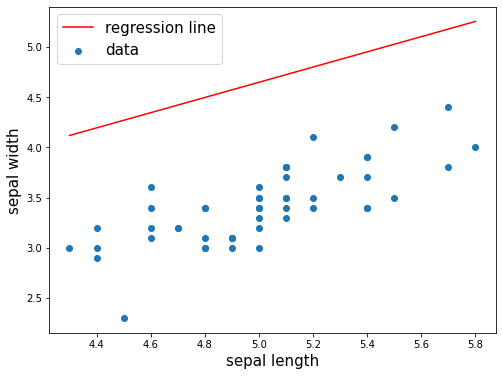

In [316]:
domain_x = np.linspace(np.min(X), np.max(X), 5)
domain_y = model.predict(domain_x.reshape(-1,1))

plt.figure(figsize = (8, 6))

plt.scatter(X, y, label = "data")
plt.plot(domain_x, domain_y, color="red", label ="regression line")
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15)
plt.legend(fontsize=15);

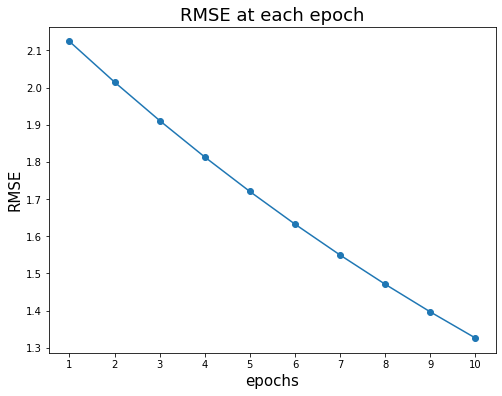

In [317]:
plt.figure(figsize = (8, 6))

plt.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("RMSE", fontsize = 15)
plt.xticks(range(1, len(model.errors) + 1))
plt.title("RMSE at each epoch", fontsize = 18);

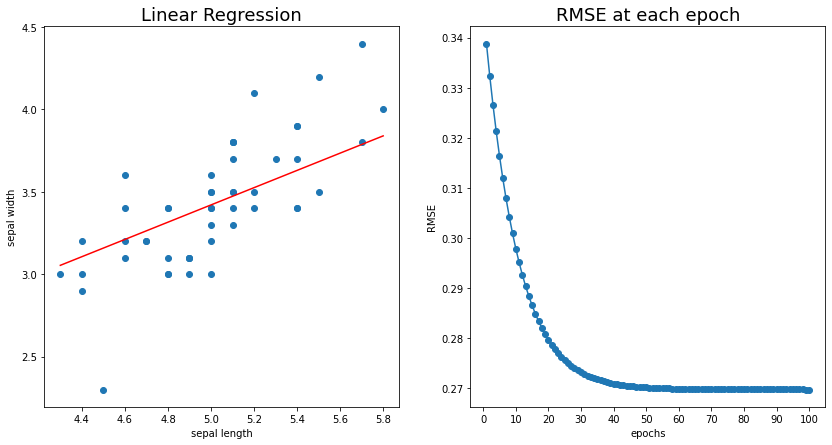

In [332]:
model = MyLinReg(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 18);

# Modifying Linear Regression

In [333]:
class MyLinReg_Mod(object):
    """
    A class used to represent a single artificial neuron for linear regression. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation term.

    theta : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors : list
        A list containing the mean squared error computed after each iteration 
        of batch gradient descent. 

    Methods
    -------
    fit(self, X, y, alpha = 0.001, epochs = 10)
        Iterates the batch gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha. The data 
        consists of the feature vector X and the associated target y. 

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the 
        activation_function to make a prediction on each data instance. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 10):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi)*xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi)**2)
                self.theta[:-1] -= 2*alpha*sum_1/n
                self.theta[-1] -= 2*alpha*sum_2/n
            self.errors.append(errors/n)
            
            #if _ > 2:
             #   if ((self.errors[-2]-self.errors[-1])/self.errors[-2]) < 0.01:
              #      break
            
            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [334]:
# We instantiate an instance of MyLinReg class with identity activation function

model = MyLinReg_Mod(identity_function)
model.fit(X, y, alpha = 0.01, epochs=100)

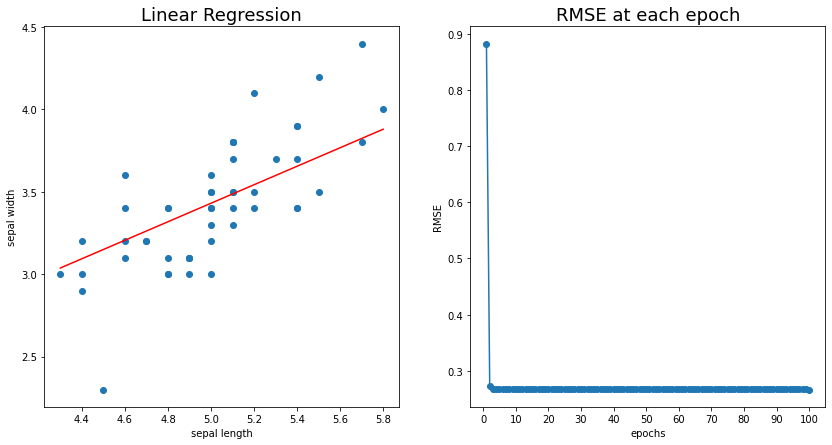

In [335]:
model = MyLinReg_Mod(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 18);

In [297]:
class MyLinReg_Soc(object):

    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 10):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]
        print(n)
        for _ in range(epochs):
            errors = 0
            for xi, yi in zip(X, y):
                error = self.predict(xi)-yi
                errors += ((self.predict(xi) - yi)**2)
                self.theta[:-1] -= 2 * alpha * error * xi
                self.theta[-1] -= 2 * alpha * error
                
                
            self.errors.append(errors/n)
            
            if _ > 2:
                if ((self.errors[-2]-self.errors[-1])/self.errors[-2]) < 0.01:
                    print("here")
                    break 

            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [298]:
# We instantiate an instance of MyLinReg class with identity activation function

model_soc = MyLinReg_Soc(identity_function)
model_soc.fit(X, y, epochs=100)

50
here


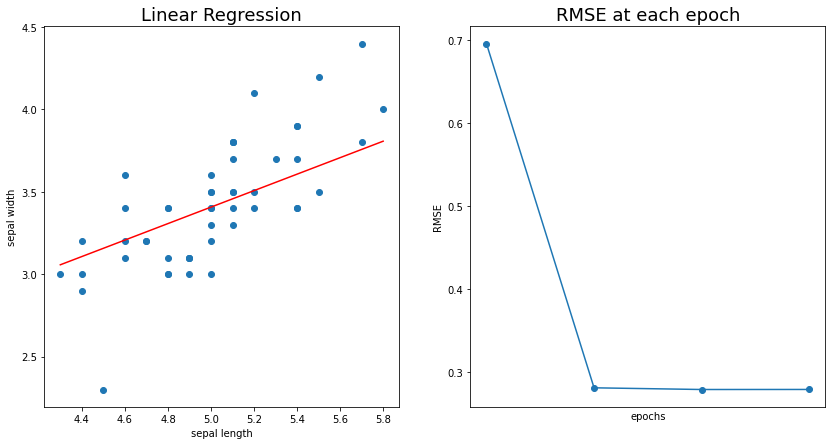

In [299]:
domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model_soc.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model_soc.errors) + 1), 
         np.sqrt(model_soc.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model_soc.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 18);

## Homework 2: 

### Part 1 

(a) Notice that we used 100 epochs which was waste of time and we could have stopped earlier since after about epoch 55 or so, the loss is not getting lower significantly. Modify the above code so that if the change in loss is less than $1\%$, you exit the iterations. 

(b) The above class uses batch gradient descent to find the minimum of the loss function. Modify the original code and use the stochastic gradient descent instead. Iterate over many iterations and see how the RMSE changes. The graph of RMSE for the batch gradient descent is smooth and decreasing as the number of iterations increases. What can you say about the graph of RMSE when the stochastic gradient descent is used?  



In [154]:
np.random.randint(0, 50)

33

## 2) Simple Linear Regression with Sklearn

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns

ads_data = pd.read_csv("advertising_dataset.csv") 

# https://www.kaggle.com/datasets/ashydv/advertising-dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

ModuleNotFoundError: No module named 'seaborn'

---

The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple media channels like TV, radio, and newspapers. We want to understand the impact of ad budgets on the overall sales.

---

In [19]:
ads_data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [20]:
ads_data = ads_data[["TV", "radio", "newspaper", "sales"]]
ads_data.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [21]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
ads_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


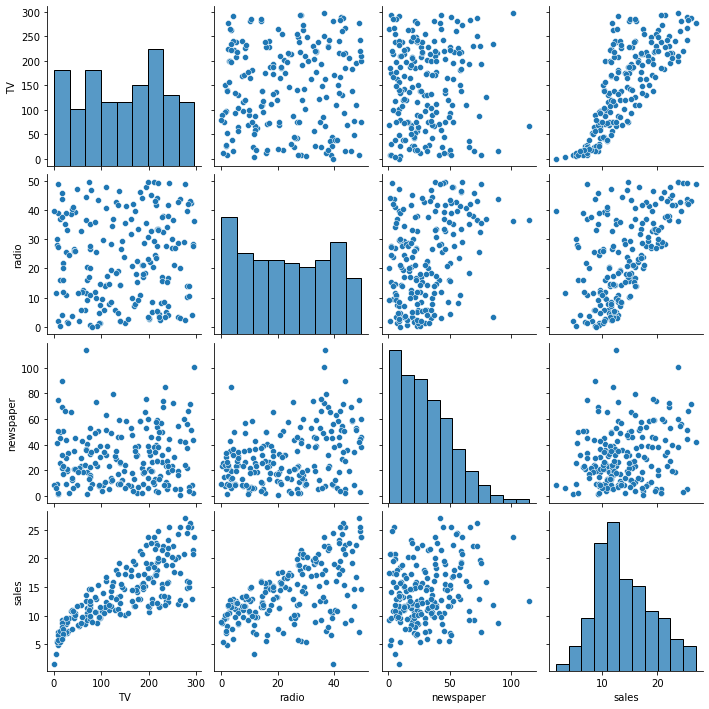

In [23]:
sns.pairplot(ads_data)

In [24]:
ads_data.cov()

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


In [25]:
corr_matrix = np.round(ads_data.corr(), 2)
corr_matrix

,TV,radio,newspaper,sales
TV,1.00,0.05,0.06,0.78
radio,0.05,1.00,0.35,0.58
newspaper,0.06,0.35,1.00,0.23
sales,0.78,0.58,0.23,1.00


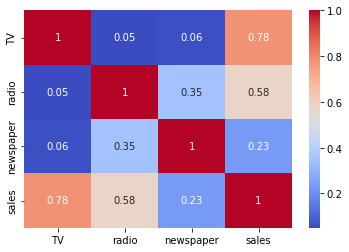

In [26]:
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm");

---

Based on the scatter plots as well as on the correlation coefficients, we choose to create a linear regression model to 
predict "sales" based on "TV".

---

In [27]:
X = ads_data[['TV']]
y = ads_data['sales']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Some recommend to do the train_test_split at the very beginning and 
# perform exploratory data analysis (EDA) only on the training data, 
# while some recommend to do EDA on the entire data set

In [29]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
w = lin_reg.coef_
b = lin_reg.intercept_
w, b

(array([0.04652973]), 7.1196384305929525)

In [31]:
print("The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = 0.047 * TV + 7.12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


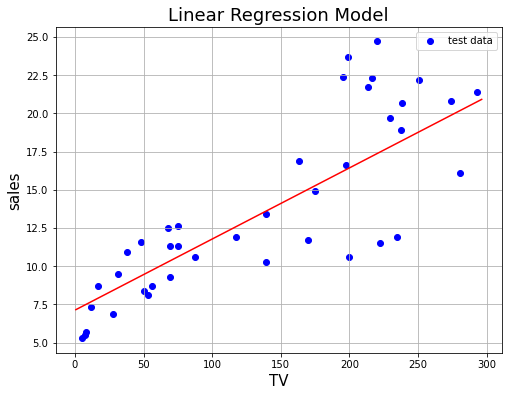

In [32]:
domain = np.linspace(X.min(), X.max(), 100)  

plt.figure(figsize = (8, 6))

#plt.scatter(X_train, y_train, color='green', label='training data')
plt.scatter(X_test, y_test, color='blue', label='test data')
plt.plot(domain, lin_reg.predict(domain), color="red")
plt.title('Linear Regression Model', fontsize=18)
plt.xlabel('TV', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.legend()
plt.grid();

In [33]:
predictions = lin_reg.predict(X)

ads_data['predicted_sales'] = np.round(predictions)

residuals = ads_data['predicted_sales'] - y

ads_data['residuals'] = residuals

ads_data

,TV,radio,newspaper,sales,predicted_sales,residuals
0,230.1,37.8,69.2,22.1,18.0,-4.1
1,44.5,39.3,45.1,10.4,9.0,-1.4
2,17.2,45.9,69.3,9.3,8.0,-1.3
3,151.5,41.3,58.5,18.5,14.0,-4.5
4,180.8,10.8,58.4,12.9,16.0,3.1
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,9.0,1.4
196,94.2,4.9,8.1,9.7,12.0,2.3
197,177.0,9.3,6.4,12.8,15.0,2.2
198,283.6,42.0,66.2,25.5,20.0,-5.5


In [34]:
mse_train = mean_squared_error(y_train, lin_reg.predict(X_train))
mse_test = mean_squared_error(y_test, lin_reg.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 3.256317025565734

RMSE on the test data: 3.194472431998898


## Multiple Linear Regression with Sklearn

In [35]:
X = ads_data[['TV', 'radio']]
y = ads_data['sales']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [38]:
w = reg.coef_
b = reg.intercept_

w, b

(array([0.04407736, 0.20260566]), 2.837617236905178)

In [39]:
print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * TV + {np.round(w[1],3)} * radio + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = 0.044 * TV + 0.203 * radio + 2.838


In [40]:
mse_train = mean_squared_error(y_train, reg.predict(X_train))
mse_test = mean_squared_error(y_test, reg.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 1.5802375959959865

RMSE on the test data: 1.915475673176425


##  Homework 2

### Part 2: 

Try using ```sklearn SGDRegressor``` class instead of ```sklearn LinearRegression```. 

If the input variables are of different scales (here, ```TV``` and ```radio```), scaling those variables improves SGD convergence. Read about ```sklearn MinMaxScaler``` and try to see if using it will give better results.  

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


https://stackoverflow.com/questions/50565937/how-to-normalize-the-train-and-test-data-using-minmaxscaler-sklearn

## 3) Polynomial Regression

In [41]:
X = ads_data[['TV']]
y = ads_data['sales']

In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)     # try also degree 5 and 10

X_poly = poly_features.fit_transform(X)

X_poly

array([[2.30100000e+02, 5.29460100e+04, 1.21828769e+07, 2.80327997e+09,
        6.45034722e+11],
       [4.45000000e+01, 1.98025000e+03, 8.81211250e+04, 3.92139006e+06,
        1.74501858e+08],
       [1.72000000e+01, 2.95840000e+02, 5.08844800e+03, 8.75213056e+04,
        1.50536646e+06],
       [1.51500000e+02, 2.29522500e+04, 3.47726588e+06, 5.26805780e+08,
        7.98110757e+10],
       [1.80800000e+02, 3.26886400e+04, 5.91010611e+06, 1.06854719e+09,
        1.93193331e+11],
       [8.70000000e+00, 7.56900000e+01, 6.58503000e+02, 5.72897610e+03,
        4.98420921e+04],
       [5.75000000e+01, 3.30625000e+03, 1.90109375e+05, 1.09312891e+07,
        6.28549121e+08],
       [1.20200000e+02, 1.44480400e+04, 1.73665441e+06, 2.08745860e+08,
        2.50912524e+10],
       [8.60000000e+00, 7.39600000e+01, 6.36056000e+02, 5.47008160e+03,
        4.70427018e+04],
       [1.99800000e+02, 3.99200400e+04, 7.97602399e+06, 1.59360959e+09,
        3.18403197e+11],
       [6.61000000e+01, 4.3692

In [48]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [49]:
w = model.coef_
b = model.intercept_
w,b

(array([ 2.77902839e-01, -4.26334400e-03,  3.38693899e-05, -1.20207585e-07,
         1.55728366e-10]),
 3.4345346719094536)

In [50]:
print(f"The regression model is: \n ")
print(f"h(x) = {np.round(w[0],5)}*x + {np.round(w[1],5)}*x^2 + {np.round(w[1],5)}*x^3 + {np.round(b,5)}")

The regression model is: 
 
h(x) = 0.2779*x + -0.00426*x^2 + -0.00426*x^3 + 3.43453


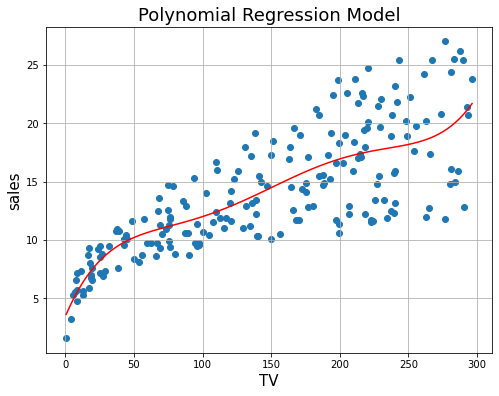

In [51]:
domain_x = np.linspace(X.min(), X.max(), 100)

domain_y = model.predict(poly_features.fit_transform(domain_x))

plt.figure(figsize = (8, 6))

plt.scatter(X, y)
plt.plot(domain_x, domain_y, color="red")
plt.title('Polynomial Regression Model', fontsize=18)
plt.xlabel('TV', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.grid();

---

**Note:** If we have two inputs features $a$ and $b$, ```PolynomialFeatures``` with ```degree=3``` and ```include_bias=True``` will produce features

$1$, $a$, $b$, $a^2$, $a^3$, $b^2$, $b^3$, as well as $ab$, $a^2b$, and $ab^2$. 

##  Homework 2

### Part 3: 

Import the data file ```mtcars.csv```. The goal is
to determine two or three continuous numerical variables that can be used to predict mpg
(miles per gallon) using multiple linear regression. You can use ```sklearn``` or custom class; batch GD, SGD, or mini-batch SGD; 
and scaling.  

### Part 4:  

Read about Probabilistic Interpretation of Linear Regression -- reference [1] in lecture notes, pages 11-13.